In [4]:
import os
import sys
import numpy             as np
import pylab             as pl
import astropy.units     as u
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [5]:
sys.path.append('{}/DESI/'.format(os.environ['HOME']))

In [6]:
import pubplot

from   ros_tools import roscen, calc_rosr
from   findfile  import findfile

In [7]:
version = 'latest'
dryrun  = False

In [14]:
#user = os.environ['USER']
#gama = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold.fits'.format(user))

fpath =  findfile(ftype='gold', version=version, dryrun=dryrun, survey='gama')
gama  =  Table.read(fpath)
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32
278399,587726031690203667,130.96962835,0.83411374,19.475662,0.20134,4,G09_Y4_235_171,5,23.158478,20.743418,19.479542,19.0298,18.6913,696.3934076006074,39.214273256107646,G9,-380.0324225352458,437.6456156416997,8.438709374373468,376.35121152626294,-440.8223214150772,8.06135281771044,1.263876,19.475662
228813,587726014012195306,218.81553829,1.16677328,19.708323,0.20001,4,G15_Y3_031_186,5,20.98638,20.429096,19.744549,19.780014,19.371407,691.2229509712038,39.19809074887812,G15,-448.7188534440341,-360.9796210027739,11.729164789394545,451.7466649744012,357.1977984891127,11.276212180030527,0.6845474,19.708323
386301,587727944562639457,131.32639169,2.12632158,19.218159,0.07694,4,G09_Y1_BX1_124,6,20.875654,19.585995,19.126356,18.917627,18.801031,244.74725036323687,36.94358910689516,G9,-149.9684107563844,170.54696068779126,8.432044902716939,148.53896289862934,-171.8006285414355,8.283111712841423,0.4596386,19.218159
3852971,588010930294161861,129.67705296,-1.81328938,18.24674,0.09923,4,G09_Y4_222_137,6,19.43047,18.488401,18.240868,18.041922,18.00638,320.7552386179504,37.530868790305604,G9,-186.20917354498556,224.47289780625698,-9.233304351406503,184.30775668026382,-226.02907352953196,-9.418111167356592,0.2475338,18.24674
296803,587726031726313717,213.47454698,1.46344577,17.416668,0.10572,5,600164332306720768,6,20.189068,18.239517,17.346529,16.949179,16.651957,343.30240530660865,37.67838423133976,G15,-258.89532613978287,-171.19372980660833,7.9293656085946775,260.3319825929413,169.0130565175055,7.6683392541236755,0.8929882,17.416668
362061,587726033336926470,213.40044229,2.62356676,17.810108,0.18273,4,G15_Y4_202_279,6,20.354645,18.735912,17.784857,17.4055,17.139894,624.6924477018449,38.97833127759916,G15,-440.48419720540636,-290.450692274948,24.176775025995898,442.9323653111519,286.74052621907134,23.732666618480142,0.9510555,17.810108
417306,587728879255683732,129.29007669,2.17630695,19.78382,0.20697,4,G09_Y4_257_171,5,22.300547,20.852804,19.749193,19.318222,18.917458,718.3587905602047,39.28170705297305,G9,-376.62106422352775,460.30365398139304,22.601539620859892,372.76385625969914,-463.4509061626556,22.227787162239576,1.103611,19.78382
171655,587725040628465844,179.35672481,-2.36065183,17.898743,0.12855,4,2dF298951,6,20.006115,18.517275,17.80914,17.506357,17.184256,424.0846204284158,38.1372626145482,G12,-375.4357335820449,4.215295488202342,-15.478116983097097,375.3713736319147,-7.368681086238095,-15.854503096040146,0.7081356,17.898743


In [15]:
#desi = Table.read('{}/data/GAMA4/desi_gold.fits'.format(os.environ['HOME']))
fpath =  findfile(ftype='gold', version=version, dryrun=dryrun, survey='desi')
desi  =  Table.read(fpath)

desi

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X_1,ROTCARTESIAN_Y_1,ROTCARTESIAN_Z_1,LUMDIST_1,DISTMOD_1,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST_2,DISTMOD_2,ROTCARTESIAN_X_2,ROTCARTESIAN_Y_2,ROTCARTESIAN_Z_2,GAMA_SEP,GOOD_MATCH,DISTMOD
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,arcsec,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,bool,float64
39627733927462346,8692.672918319702,121.68951238388622 .. -14.996086956969426,3.8697103852301554e-05,0,7886,GALAXY,--,10,301.08885838184506,0,212.07182231138097,-2.1576366940231786,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,318256,1482,SER,5.435668,15.029476,29.7828,334.7293,124.587234,36.408154,0,0,--,0.0,0.0,0.0,0.0,2121m022,0.059076868,28.868391,23.604856,2.337881,0.5745999,2.3560472,6.5144067,12.909119,2.3666756,6.5423255,12.962651,2.4321775,0.82148373,0.07292092,-0.32329565,S,102100,9,1152921504606846976,131074,0,0,0,0,0,212.07182231138097,-2.1576366940231786,1,329.2138,1,1,-0.004,0.004,0.001,0.001,212.0718068853151,0.0,-2.157639871379078,0.0,0.7514636,17,1.7193414733275092,True,0.2083179377892946,NAN,20.471994,19.429739,18.838074,19.060822,1.0422554,19.429739,True,True,True,1.0,3.0714285714285716,0.011040410670367769,1,532,5321463,True,1,0.5714285714285714,0.3333333333333333,37439489807543353 .. 6991981798404131877,0.3203125,-507.1203432685779,-317.768561089396,-22.547181101771436,594.3603441810435,-11.580419903600614,-72.51173345845032,723.6364599106233,39.29760220179492,484694,587729777980080344,212.11902641,-1.99469181,18.352848,0.0834,4,G15_Y1_AX2_138,6,19.914825,18.74629,18.352043,18.08017,18.216,266.54587418951854,37.12885982277625,209.32738594082488,128.97464289104732,-8.77333933806804,610.6892146

In [6]:
desi_gama = Table.read('{}/data/GAMA4/desi_gama.fits'.format(os.environ['HOME']))
desi_gama

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,CARTESIAN_X_1,CARTESIAN_Y_1,CARTESIAN_Z_1,ROTCARTESIAN_X_1,ROTCARTESIAN_Y_1,ROTCARTESIAN_Z_1,ZDESI,LUMDIST_1,DISTMOD_1,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST_2,DISTMOD_2,CARTESIAN_X_2,CARTESIAN_Y_2,CARTESIAN_Z_2,ROTCARTESIAN_X_2,ROTCARTESIAN_Y_2,ROTCARTESIAN_Z_2,GAMA_SEP,GOOD_MATCH
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,-256.9031198981546,4.311277609403189,-7.325476491787672,209.7287656901805,-148.4546223117173,-6.821487390695841,0.08720044682704724,279.4580234303819,37.23158291510796,G12,17.080044,True,True,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.2861975876171,37.23024736630215,-256.75708194725576,4.308781210287915,-7.321305710513508,256.70436181560433,-6.465302621376652,-7.578702379172695,0.03700738404518863,True
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786

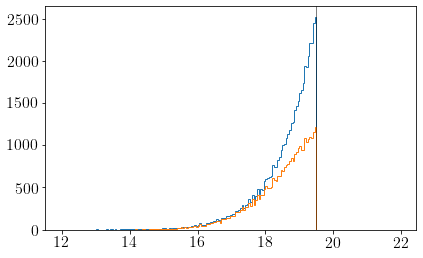

In [7]:
_ = pl.hist(desi_gama['RMAG_DRED'], histtype='step', bins=np.arange(12., 22., 0.05))
_ = pl.hist(desi['RMAG_DRED'],      histtype='step', bins=np.arange(12., 22., 0.05))

pl.axvline(19.5, c='k', lw=0.5)

Text(0, 0.5, 'N')

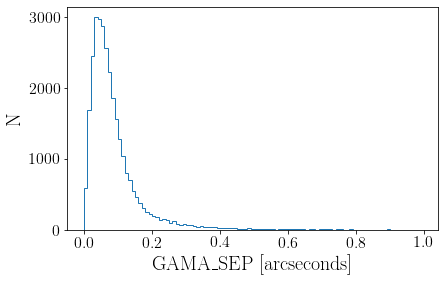

In [8]:
plt.hist(desi['GAMA_SEP'].data, histtype='step', bins=np.arange(0., 1., 1.e-2))

plt.xlabel('GAMA_SEP [arcseconds]')
plt.ylabel('N')

In [9]:
good_match = desi['GAMA_SEP'].data < .6

print('Good match fraction: {:.4f}[%]'.format(100. * np.mean(good_match)))

Good match fraction: 90.3649[%]


In [10]:
100. * np.mean(desi['GAMA_FIELD'].data == b'NAN')

6.9452906055806025

In [11]:
no_match = desi[~good_match]
match    = desi[ good_match]
match

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,CARTESIAN_X_1,CARTESIAN_Y_1,CARTESIAN_Z_1,ROTCARTESIAN_X_1,ROTCARTESIAN_Y_1,ROTCARTESIAN_Z_1,ZDESI,LUMDIST_1,DISTMOD_1,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST_2,DISTMOD_2,CARTESIAN_X_2,CARTESIAN_Y_2,CARTESIAN_Z_2,ROTCARTESIAN_X_2,ROTCARTESIAN_Y_2,ROTCARTESIAN_Z_2,GAMA_SEP,GOOD_MATCH
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,-256.9031198981546,4.311277609403189,-7.325476491787672,209.7287656901805,-148.4546223117173,-6.821487390695841,0.08720044682704724,279.4580234303819,37.23158291510796,G12,17.080044,True,True,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.2861975876171,37.23024736630215,-256.75708194725576,4.308781210287915,-7.321305710513508,256.70436181560433,-6.465302621376652,-7.578702379172695,0.03700738404518863,True
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786

Text(0, 0.5, 'Declination [deg.]')

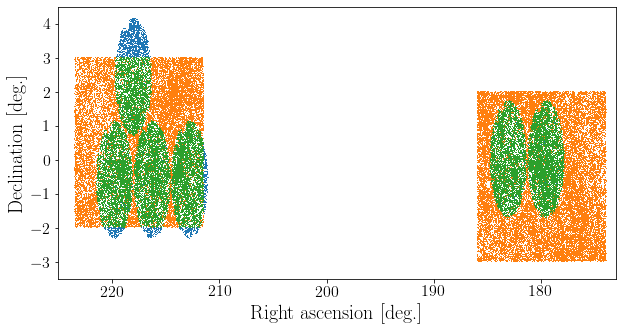

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(desi['TARGET_RA'],   desi['TARGET_DEC'], marker=',', lw=0.0)
pl.plot(gama['RA'],   gama['DEC'], marker=',', lw=0.0)
pl.plot(match['TARGET_RA'], match['TARGET_DEC'], marker=',', lw=0.0)

pl.xlim(225., 173.)
pl.ylim(-3.5,  4.5)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

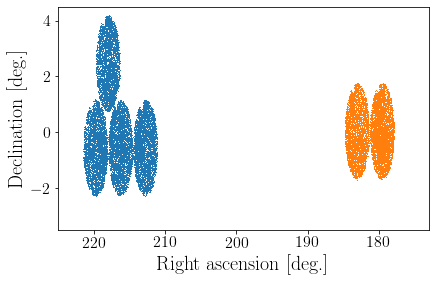

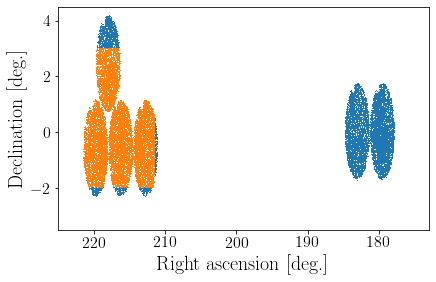

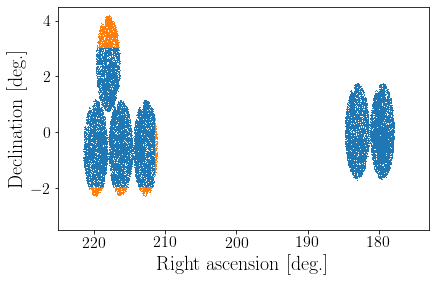

In [13]:
for field in np.unique(desi['GAMA_FIELD'].data):
    pl.plot(desi['TARGET_RA'], desi['TARGET_DEC'], marker=',', lw=0.0)
    pl.plot(desi['TARGET_RA'][desi['GAMA_FIELD'].data == field], desi['TARGET_DEC'][desi['GAMA_FIELD'].data == field], marker=',', lw=0.0)

    pl.xlim(225., 173.)
    pl.ylim(-3.5,  4.5)

    pl.xlabel('Right ascension [deg.]')
    pl.ylabel('Declination [deg.]')
    
    pl.show()

In [14]:
100. * len(no_match) / len(desi), 100. * np.count_nonzero(no_match['GAMA_FIELD'] == b'NAN') / len(desi)

(9.635067625198001, 6.945290605580602)

In [15]:
no_match = no_match[no_match['GAMA_FIELD'] != b'NAN']
no_match

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,CARTESIAN_X_1,CARTESIAN_Y_1,CARTESIAN_Z_1,ROTCARTESIAN_X_1,ROTCARTESIAN_Y_1,ROTCARTESIAN_Z_1,ZDESI,LUMDIST_1,DISTMOD_1,GAMA_FIELD,RMAG_DRED,GOOD_Z,IN_GOLD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST_2,DISTMOD_2,CARTESIAN_X_2,CARTESIAN_Y_2,CARTESIAN_Z_2,ROTCARTESIAN_X_2,ROTCARTESIAN_Y_2,ROTCARTESIAN_Z_2,GAMA_SEP,GOOD_MATCH
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,arcsec,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes3,float32,bool,bool,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
39627751489012980,8736.21676492691,776.7664538911582 .. -8.061740968395892,5.399940122889987e-06,0,7919,GALAXY,--,10,1670.2557117938995,0,178.80102417267298,-1.4268060770775728,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.985942606933922,575,9010,322443,1268,SER,11.727854,17.699108,22.258057,163.28955,81.457054,16.802336,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.02546514,14.878554,5.01466,2.0774882,0.45524412,1.539735,2.3236933,2.9222322,1.5397358,2.3236952,2.9222348,0.5236543,2.2283788,0.2143134,-0.26564842,S,102100,9,5764607523034234880,131074,0,131072,0,0,0,178.80102417267298,-1.4268060770775728,2,912.8835,2,1,0.0055,0.0065192026,-0.0115,0.01430035,178.80104390679838,0.044652227,-1.4267637777762823,0.11282692,0.7021714,1,1.6352388176075028,-389.39217888266387,8.149639878549959,-9.70095353739184,316.9750374934996,-226.3486462537043,-8.939242125770095,0.133410456483349,441.5747270344027,38.2250210457118,G12,19.32499,True,True,144095,587724650867130690,178.80110253,-1.42699825,19.415764,0.13355,4,G12_Y2_026_219,5,20.644794,19.76827,19.383938,19.166662,18.93593,442.07839449988353,38.22749645172045,-389.78829813623537,8.157397004885429,-9.712130272213374,389.696093781403,-11.431200265058589,-10.102876633839513,0.7470888717972285,False
39627757545591891,8936.934342354536,1202.4033838894127 .. 9.353745611047382,5.1771655121327246e-05,0,7922,GALAXY,--,10,1267.6229182947427,0,179.98914003117494,-1.3672142239000142,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.12873837344001315,516,9010,323887,5203,SER,13.285279,45.843437,90.2849,205.09554,92.950325,19.318233,0,3602450823642088192,G2,19.863712,19.448198,17.798765,0.0,1798m012,0.028576912,103.1528

Text(0, 0.5, 'Declination [deg.]')

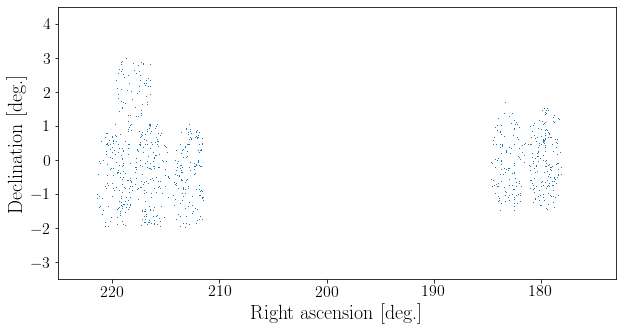

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(no_match['TARGET_RA'], no_match['TARGET_DEC'], marker=',', lw=0.0)

pl.xlim(225., 173.)
pl.ylim(-3.5,  4.5)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

In [17]:
100. * len(no_match) / len(desi)

2.6897770196173996

In [18]:
# sorted(desi.dtype.names)

In [19]:
def zcomp(match, xcol='ZDESI', ycol='ZGAMA', xlabel=r'$z_{\rm DESI}$', ylabel=r'$z_{\rm GAMA}$'):
    fig, ax = plt.subplots(2, 1,\
                           figsize=(5, 8),\
                           sharex=True,\
                           gridspec_kw = {'height_ratios': [2, 1],\
                                          'hspace':0.05})

    ax[0].scatter(match[xcol], match[ycol], s=0.15)

    ax[0].axes.get_xaxis().set_visible(False)
    
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    ax[0].set_xlim(-0.05, 0.3)
    ax[0].set_ylim(-0.05, 0.3)

    ax[1].scatter(match[xcol], (match[ycol] - match[xcol]) / (1. + match[xcol]), s=0.15)
    
    ax[1].set_xlim(-0.0, 0.3)
    ax[1].set_ylim(-0.003, 0.003)
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(r'$\Delta z \ / \ (1 + z_{\rm DESI}) $')

    ax[1].axhline(y = 0.001, color = 'k', linewidth=.5)
    ax[1].axhline(y = -0.001, color = 'k', linewidth=.5)

    ax[0].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


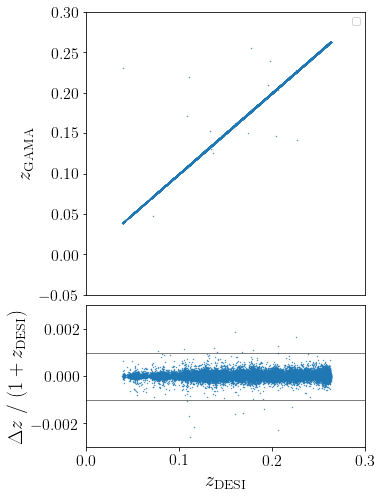

In [20]:
zcomp(match)

In [21]:
thres    = 1000. # km/s

z_ratio  = np.abs(match['ZGAMA'] - match['ZDESI']) / (1. + match['ZGAMA'])
cat_frac = np.mean(z_ratio > (thres / 2.9979e5))

print('For {} km/s, catastrophic failures are: {:.4f} [%]'.format(thres, 100. * cat_frac))

For 1000.0 km/s, catastrophic failures are: 0.0405 [%]


# GAMA - DESI

In [22]:
gama_desi = Table.read('{}/data/GAMA4/gama_desi.fits'.format(os.environ['HOME']))
gama_desi

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,DESI_SEP,GOOD_MATCH
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float64,bool
622826,588848900966843153,135.29128973,0.73684492,19.52932,0.19599,4,G09_Y4_250_046,5,22.020153,20.377008,19.499466,19.005283,18.786238,675.6378214236531,39.148569764410766,G9,-401.4507325397739,397.38942226883273,7.264870993114358,398.1057165460414,-400.7474548163634,6.865700983452657,39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,44.313563775417826,True,0.08720044682704724,G12,153297.4630034124,False
98018,587722984422572189,175.80676776,1.03979445,17.181564,0.12235,5,318751477415831552,6,20.014534,18.041721,17.051146,16.660717,16.285437,401.92205472701687,38.020709189748985,G12,-357.0901766741274,26.18065690719771,6.498521489182441,356.8640071382125,-29.17917108743816,6.140703437324076,39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.1

In [23]:
sorted(gama_desi.dtype.names)

['BGS_TARGET',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'DEC',
 'DELTACHI2',
 'DESI_SEP',
 'DESI_TARGET',
 'DISTMOD',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIELD',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GMAG_DRED_SDSS',
 'GOOD_MATCH',
 'GOOD_Z',
 'IMAG_DRED_SDSS',
 'LUMDIST',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SPECFLUX',
 'MORPHTYPE',
 'MWS_TARGET',
 'NCOEFF',
 'NPIXELS',
 'NQ',
 'NUMOBS_INIT',
 'OBJID',
 'OBJTYPE',
 'OBSCONDITIONS',
 'PARALLAX',
 'PHOTSYS

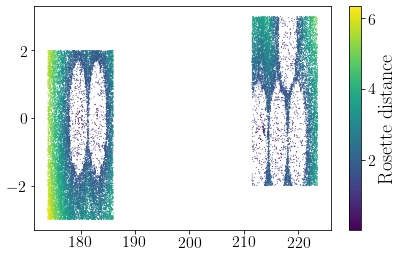

In [24]:
isin = (~gama_desi['GOOD_MATCH'].data) & (gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['RA'] > 170.) 

pl.scatter(gama_desi['RA'][isin], gama_desi['DEC'][isin], c=gama_desi['ROS_DIST'][isin], marker='.', lw=0.0, s=4)
pl.colorbar(label='Rosette distance')

Text(0, 0.5, 'Declination [deg.]')

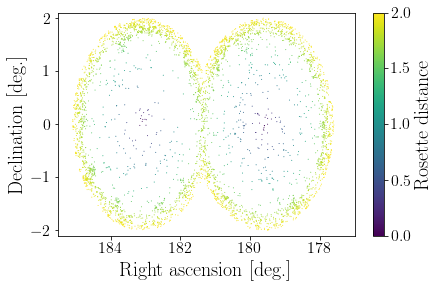

In [25]:
no_match = (~gama_desi['GOOD_MATCH'].data) & (gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < 2.0) 
no_match =   gama_desi[no_match]

pl.scatter(no_match['RA'], no_match['DEC'], c=no_match['ROS_DIST'], marker='.', lw=0.0, s=4, vmin=0.0, vmax=2.0)
pl.colorbar(label='Rosette distance')

pl.xlim(185.5, 177.)
pl.ylim(-2.1,   2.1)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

1	179.600	+0.000	0.252
2	183.100	+0.000	0.255
8	216.300	-0.600	0.195
9	219.800	-0.600	0.148
10	218.050	+2.430	0.137
17	212.800	-0.600	0.141


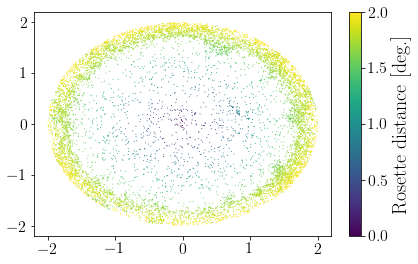

In [57]:
for rosn in [1,2,8,9,10, 17]:
    isin = calc_rosr(rosn, no_match['RA'], no_match['DEC']) < 2.0
    cen  = roscen[rosn]
    
    print('{:d}\t{:.3f}\t{:+.3f}\t{:.3f}'.format(rosn, cen[0], cen[1], np.mean(isin)))
    
    pl.scatter(no_match['RA'][isin]  - cen[0],\
               no_match['DEC'][isin] - cen[1],\
               c=no_match['ROS_DIST'][isin],\
               marker='.',\
               lw=0.0,\
               s=4,\
               vmin=0.0,\
               vmax=2.0)

pl.colorbar(label='Rosette distance [deg.]')

(0.0, 35.0)

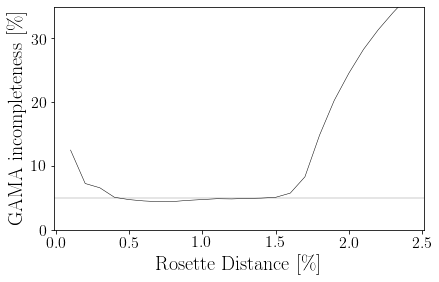

In [83]:
rads   = np.arange(0.1, 2.5, 0.1)
result = []

for level in np.arange(5.0, 6.0, 1.):
    pl.axhline(level, c='k', lw=0.2)

for rad in rads:
    # https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent
    ntargets  = np.count_nonzero((gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < rad))
    n_nomatch = np.count_nonzero((gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < rad) & (~gama_desi['GOOD_MATCH'].data)) 

    result.append(100. * n_nomatch / ntargets)
    
result = np.array(result)

pl.plot(rads, result, c='k', lw=0.5)

pl.xlabel('Rosette Distance [\%]')
pl.ylabel('GAMA incompleteness [\%]')

pl.ylim(0.0, 35.0)

In [96]:
misses = gama_desi[(gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < 1.5) & (~gama_desi['GOOD_MATCH'].data)]
misses

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,DESI_SEP,GOOD_MATCH
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float64,bool
584778,588848899912761780,180.17612274,-0.03428177,18.665443,0.13016,4,MGC27756,6,19.991354,19.067125,18.60622,18.332573,18.25625,429.8668769072724,38.16666991073738,G12,-380.3574528477606,-1.169192710874144,-0.2275802858021921,380.3534361088595,-2.0257236320131566,-0.6089541597042878,39627751489014305,8953.768253155053,1282.7805613263436 .. 48.58754604779603,2.2277915886812837e-05,0,7919,GALAXY,--,10,725.3538673203439,0,178.86420494548113,-1.4491717083527806,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.40727941277635415,516,9010,322443,2593,SER,69.021,159.46623,289.541,26.19557,12.183489,2.7300134,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.026793737,210.11415,145.86002,0.44047555,0.12931846,5.15557,11.911437,21.627459,5.1555743,11.911443,21.627462,3.6187918,6.463361,-0.13589828,0.008760201,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.86420494548113,-1.4491717083527806,2,912.8835,2,1,0.0035,0.0038078865,-0.0105,0.013509256,178.86421721451785,0.017117688,-1.4491329003050288,0.1137048,0.7077981,1,0.5771417604809567,True,0.1433337776623371,G12,0.4205622900976624,False
297982,587726031728214468,217.79599054,1.26787261,19.087366,0.13216,4,G15_Y3_001_169,6,20.62283,19.549208,19.09172,18.784248,18.568039,437.06528218302986,38.202731550691674,G15,-304.97767890135395,-236.53075597938334,8.541931142372515,306.9621095555204,233.9607014283553,8.234149880449866,39627751489015932,8687.303691085428,705.0430388142453 .. 17.175689830567133,2.3824515197140897e-05,0,7894,GALAXY,--,10,297.5537811522372,0,178.94761063701503,-1.5522217397472335,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.8407840645505351,516,9010,322443,4220,SER,90.36573,165.19347,254.13504,22.160728,14.231687,2.832595,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.026832078,174.3194,101.75965,0.78126454,0.23762463,3.0512354,5.577824,8.580972,3.0512354,5.577824,8.580972,0.70793134,4.549793,0.10926673,0.18057567,S,1021

In [97]:
control     = gama_desi[(gama_desi['RMAG_DRED_SDSS'] < 19.5) & (gama_desi['ROS_DIST'] < 1.5)]

Text(0.5, 0, '$r_{SDSS}$')

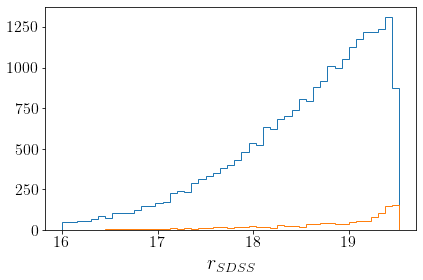

In [102]:
cnt_hist    = pl.hist(control['RMAG_DRED_SDSS'].data, histtype='step', bins=np.arange(16., 19.55, 0.075))
misses_hist = pl.hist( misses['RMAG_DRED_SDSS'].data, histtype='step', bins=np.arange(16., 19.55, 0.075))

pl.xlabel(r'$r_{SDSS}$')

Text(0, 0.5, 'GAMA Incompleteness')

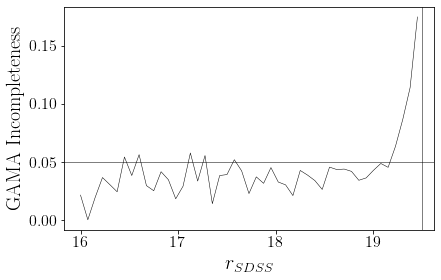

In [103]:
pl.plot(misses_hist[1][:-1], misses_hist[0] / cnt_hist[0], c='k', lw=0.5)

pl.axhline(.05,  c='k', lw=0.5)
pl.axvline(19.5, c='k', lw=0.5)

pl.xlabel(r'$r_{SDSS}$')
pl.ylabel(r'GAMA Incompleteness')

# DESI SV3 Gold

In [104]:
desi_sv3 = Table.read('{}/data/GAMA4/desi_sv3_gold.fits'.format(os.environ['HOME']))
desi_sv3

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,RMAG_DRED,IN_GOLD
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float64,float64,float64,float64,float64,float64,float64,float64,float32,bool
39633166985594086,8161.966528326273,431.54444110266667 .. 0.37436575275004985,1.5949780393114214e-05,0,7926,GALAXY,--,10,691.3415319025517,0,245.95428861898907,45.110617535314425,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.7450889382379872,516,9011,565022,1254,SER,12.762528,27.279205,48.365807,88.751724,46.159653,18.345007,0,0,--,0.0,0.0,0.0,0.0,2460p450,0.0074150483,48.3229,35.17903,3.379117,1.207703,2.9170544,6.235044,11.054682,2.9170544,6.235044,11.054682,0.61969316,1.6813492,-0.40741447,0.14170305,N,102100,9,1152921504606846976,514,0,0,0,0,0,245.95428861898907,45.110617535314425,4,2670.7947,2,1,-0.00075,0.003968627,0.0,0.0017320508,245.95428441609783,0.11145355,45.11061755278615,0.022525022,0.7297878,13,1.6614687926952203,True,0.19225187007353295,NAN,-159.47880253445373,-357.4275390593515,392.90650277481814,363.2244043646719,211.30483129504606,361.9140152078768,661.2038551868037,39.10167688542774,18.894367,True
39633166985594263,9487.479449011385,11.778540737206658 .. 28.903713267879542,3.7003942799268754e-05,0,7921,GALAXY,--,10,162.0550653114915,0,245.96595252669218,45.09575017209191,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.5414673071765063,516,9011,565022,1431,SER,5.620103,17.415108,41.365597,94.712456,44.780445,17.260471,0,0,--,0.0,0.0,0.0,0.0,2460p450,0.007530189,90.10934,80.74812,2.290763,0.8514775,1.4784573,4.581321,10.881878,1.4798447,4.5829268,10.881932,2.6836996,2.3807688,-0.15365115,-0.75679773,N,102100,9,1152921504606846976,514,0,0,0,0,0,245.96595252669218,45.09575017209191,2,1357.1959,2,1,0.0,0.005,-0.009,0.009055385,245.96595267145904,0.1429104,45.09578313105753,0.013018471,0.7163139,13,1.6469002067184357,True,0.19810591431732485,NAN,-164.09875606696482,-367.9831844608404,404.26333597304637,373.8544344458411,217.59442575628074,372.3632612459198,683.8329184909115,39.17475001560831,19.381382,True
39633166985594300,8840.833384888712,445.6807665481852 .. -13.597592900360423,0.000198017108481484,0,7925,GALAXY,--,10,335.724442104809,0,245.96843547144243,45.09214401847235,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.2949408331841764,516,9011,565022,1468,DEV,4.221143,19.593254,43.107624,151.95273,62.037014,26.96179,0,0,--,0.0,0

Text(0, 0.5, 'Declination [deg.]')

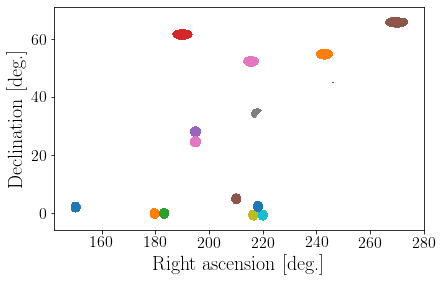

In [111]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] * 10

for rosn in np.arange(17):
    isin = desi_sv3['ROS'] == rosn
    
    pl.scatter(desi_sv3['TARGET_RA'][isin],\
               desi_sv3['TARGET_DEC'][isin],\
               c=colors[rosn],\
               marker='.',\
               lw=0.0,\
               s=3)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

# Done.